题目一： 
下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [7]:
import pandas as pd
data=pd.read_excel("sz50.xlsx",None,index="datatime");
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


题目二：
读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值


In [8]:
import numpy as np
import talib as ta
data=pd.read_excel("sz50.xlsx",sheet_name='600036.XSHG',index="datatime")
print(data)
'''
data=np.array(stock.close)
data1=ta.MA(data,10)[-5:]
print(type(data))
print(data1)
'''

               datetime   close    high     low    open    volume
0   2017-01-03 15:00:00   69.31   69.39   67.80   67.92  30449820
1   2017-01-04 15:00:00   69.42   69.89   68.88   69.08  25665746
2   2017-01-05 15:00:00   69.85   70.27   69.58   69.66  24562635
3   2017-01-06 15:00:00   69.35   70.08   69.31   69.85  17487854
4   2017-01-09 15:00:00   69.23   69.96   69.12   69.66  17341504
5   2017-01-10 15:00:00   69.23   69.81   69.12   69.27  10668237
6   2017-01-11 15:00:00   69.27   69.73   69.19   69.58  13428968
7   2017-01-12 15:00:00   69.46   69.96   69.23   69.27  14095858
8   2017-01-13 15:00:00   70.27   70.93   69.39   69.46  25113771
9   2017-01-16 15:00:00   71.62   71.74   70.08   70.16  75103166
10  2017-01-17 15:00:00   71.20   71.74   71.12   71.39  23566010
11  2017-01-18 15:00:00   71.74   71.82   71.28   71.35  17879565
12  2017-01-19 15:00:00   71.47   72.32   71.43   71.59  13110922
13  2017-01-20 15:00:00   71.66   71.97   71.28   71.55  21739051
14  2017-0

'\ndata=np.array(stock.close)\ndata1=ta.MA(data,10)[-5:]\nprint(type(data))\nprint(data1)\n'

题目三：将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

<class 'numpy.ndarray'>


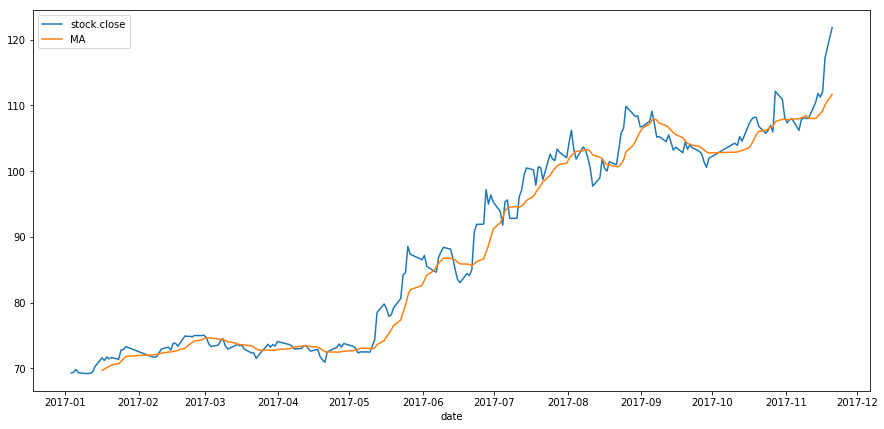

In [7]:
import matplotlib.pyplot as plt
MA=ta.MA(data,10)
#print(type(MA))

MA_series=pd.Series(MA,index=stock.index)
plt.figure(figsize=(15, 7))
plt.plot(stock.close)
plt.plot(MA_series)
plt.xlabel("date")
plt.legend(['stock.close','MA'])
plt.show()


题目四：
用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。


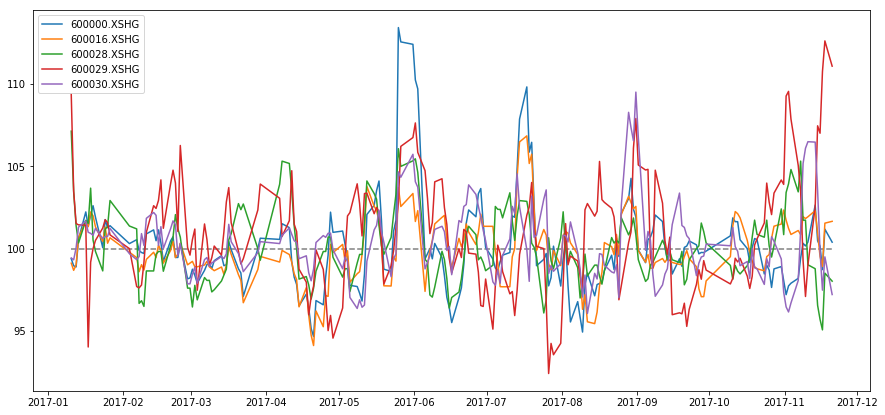

In [25]:
symbol=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG','600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG']
from talib import abstract
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
#处理掉缺失数据
PN=PN.dropna(how='ALL')
#生成DataFrame
df_ROCR100 = pd.DataFrame({name: ta.abstract.ROCR100(value, 5) for name, value in PN.iteritems()})
#作图
stock1 = pd.read_excel('sz50.xlsx',sheetname='600000.XSHG', index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600016.XSHG', index_col='datetime')
stock3 = pd.read_excel('sz50.xlsx',sheetname='600028.XSHG', index_col='datetime')
stock4 = pd.read_excel('sz50.xlsx',sheetname='600029.XSHG', index_col='datetime')
stock5 = pd.read_excel('sz50.xlsx',sheetname='600030.XSHG', index_col='datetime')

symbol= ['600000.XSHG','600016.XSHG','600028.XSHG','600029.XSHG','600030.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
    data = pd.DataFrame(data_dict)

price_dict = {name: data[name] for name in symbol}
data_mom = pd.DataFrame({item: ta.ROCR100(value.values,5) for item,value in price_dict.items()},index=data.index).dropna()
fig = plt.figure(figsize=(15, 7))
plt.plot(data_mom)
plt.hlines(100,data_mom.index[0],data_mom.index[-1] , linestyles='dashed', alpha=0.5)
plt.legend(data_mom.columns, loc='upper left')
plt.show()


题目五：
用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式


In [28]:
symbol=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG','600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG']

import warnings
warnings.filterwarnings("ignore")

data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
PN=PN.dropna(how="ALL")
pn_macd = pd.Panel({name: ta.abstract.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame().head(18)
print(df_macd)


                                      macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600518.XSHG   1.014290    2.387216  -1.372926
                    600519.XSHG  20.810882    7.146779  13.664103
                    600606.XSHG   0.298737    0.267833   0.030904
                    600837.XSHG  -1.406916   -0.673088  -0.733828
                    600919.XSHG   0.203864    0.155884   0.047980
          